In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [28]:
train = pd.read_csv('fashion-mnist_train.csv')

In [18]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x_train = train.drop('label' , axis = 1)
y_train = train['label']
test = pd.read_csv('fashion-mnist_test.csv')
x_test = test.drop('label' , axis = 1)
y_test = test['label']

In [20]:
#Normalisation

x_train = x_train.astype('float32') /255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train.values.reshape(-1, 28,28,1)
x_test = x_test.values.reshape(-1, 28,28,1)



In [21]:
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D,Dense , Flatten

model = Sequential()
model.add(Conv2D(filters = 64 , kernel_size = (3,3) , input_shape = (28,28,1) ,activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1384576   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [22]:
model.fit(x_train , y_train , epochs = 7 , batch_size = 42 , validation_data = (x_test, y_test))

Epoch 1/7
1429/1429 [==============================] - 27s 18ms/step - loss: 0.3995 - accuracy: 0.8584 - val_loss: 0.2947 - val_accuracy: 0.8992
Epoch 2/7
1429/1429 [==============================] - 25s 17ms/step - loss: 0.2717 - accuracy: 0.9030 - val_loss: 0.2475 - val_accuracy: 0.9130
Epoch 3/7
1429/1429 [==============================] - 25s 17ms/step - loss: 0.2264 - accuracy: 0.9171 - val_loss: 0.2317 - val_accuracy: 0.9149
Epoch 4/7
1429/1429 [==============================] - 25s 17ms/step - loss: 0.1935 - accuracy: 0.9288 - val_loss: 0.2209 - val_accuracy: 0.9187
Epoch 5/7
1429/1429 [==============================] - 25s 17ms/step - loss: 0.1675 - accuracy: 0.9385 - val_loss: 0.2370 - val_accuracy: 0.9127
Epoch 6/7
1429/1429 [==============================] - 25s 17ms/step - loss: 0.1432 - accuracy: 0.9463 - val_loss: 0.2265 - val_accuracy: 0.9227
Epoch 7/7
1429/1429 [==============================] - 25s 17ms/step - loss: 0.1235 - accuracy: 0.9545 - val_loss: 0.2403 - val_ac

In [29]:
loss , accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2403 - accuracy: 0.9176


In [34]:
predictions = model.predict(x_test[:1])

1/1 [==============================] - 0s 65ms/step


In [35]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [36]:
label = labels[np.argmax(predictions)]

t_shirt


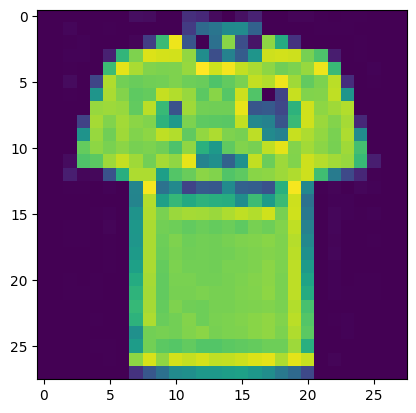

In [37]:
print(label)
plt.imshow(x_test[:1][0])

In [38]:
predictions2 = model.predict(x_test[1:2])

1/1 [==============================] - 0s 62ms/step


In [39]:
label2 = labels[np.argmax(predictions2)]

trouser


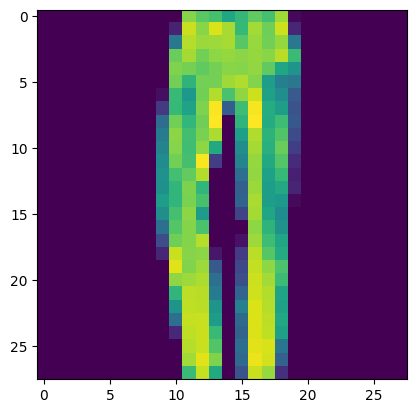

In [40]:
print(label2)
plt.imshow(x_test[1:2][0])